In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

<p style="font-size: 30px; line-height: 135%;}">
<b>Calidad de un vino</b>
</p>

<p style="font-size: 25px; line-height: 135%;}">
<b>Pregunta a</b>
</p>

In [2]:
import pandas as pd
df_red = pd.read_csv("winequality-red.csv",sep=";")
df_white = pd.read_csv("winequality-white.csv",sep=";")
df = pd.concat([df_red,df_white], axis=0)

df = df.assign(Tinto = pd.Series(np.array([1] * len(df_red) + [0] * len(df_white))).values)

#display(df)
display(df.describe())
df.info()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Tinto
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
Tinto                   6497 non-null int64
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


<p style="font-size: 18px; line-height: 135%;}">
<b>a)</b> El dataset presenta un total de 6497 registros, estos con 13 atributos no nulos. Se pueden ver estadisticos relacionados a cada atributo en la tabla mostrada con el método ``df.describe()``
</p>

<p style="font-size: 25px; line-height: 135%;}">
<b>Pregunta b</b>
</p>

In [3]:
df['good_quality'] = [1 if q>5 else 0 for q in df.quality]
del df['quality']

In [4]:
from sklearn.model_selection import train_test_split

atributos = list(df)
atributos.remove("good_quality")

X = df.as_matrix(atributos)
y = df.as_matrix(["good_quality"])

#Se proceden a generar los conjuntos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

<p style="font-size: 25px; line-height: 135%;}">
<b>Pregunta c</b>
</p>

In [5]:
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier as Tree

mejor = -1
#Se empieza a probar con profundidades del 1 al 100
for p in range(1, 101):
    model = Tree(random_state=0, max_depth=p)
    model.fit(X_train, y_train)
    y_pred_val = model.predict(X_val)
    score = f1_score(y_val, y_pred_val, average='binary')  
    
    #Se evalua cual es el mejor puntaje y se almacena este y su profundidad
    if score > mejor:
        mejor = score
        mejorProfundidad = p
        
model = Tree(random_state = 0, max_depth = mejorProfundidad)
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
score = f1_score(y_test, y_pred_test, average='binary')  
        
print("El mejor puntaje objtenido es: "+str(score)+" , con profundidad",mejorProfundidad)

El mejor puntaje objtenido es: 0.78533007335 , con profundidad 11


<p style="font-size: 18px; line-height: 135%;}">
<b>c)</b> Se realizó un árbol de decisión y se fue probando desde la profundidad 1 a la 100, finalmente se muestra que la métrica F1-score da app 0.78 y con profundidad 11
</p>

<p style="font-size: 25px; line-height: 135%;}">
<b>Pregunta d</b>
</p>

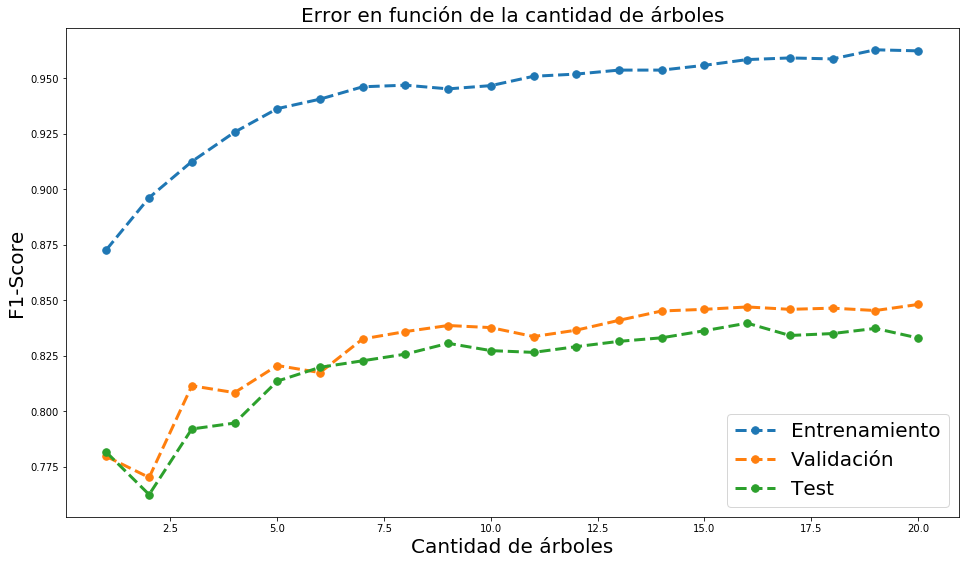

El mejor F1-Score es 0.833013435701


In [6]:
from sklearn.ensemble import RandomForestClassifier

eTest = list()
eTrain = list()
eVal = list()

maxArboles = 21

#Se procede a calcularlos errores en funcion de la cantidad de árboles
for i in range(1, maxArboles):
    model = RandomForestClassifier(random_state = 0, n_estimators = i, max_depth=mejorProfundidad, n_jobs=-1)
    
    #Se entrena el modelo, notar que se transforma la matriz columna y a un vector fila
    model.fit(X_train, y_train.reshape(y_train.shape[0]))
    
    #Se predice el entrenamiento y el test
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    y_pred_test = model.predict(X_test)
    
    #Se guardan los errores
    eTrain.append(f1_score(y_train, y_pred_train))
    eVal.append(f1_score(y_val, y_pred_val))
    eTest.append(f1_score(y_test, y_pred_test))
    
plt.figure(figsize = (16, 9))

grosor = 3
tamañopto = 15

plt.plot( [i for i in range(1, maxArboles)] , eTrain, ".--", linewidth = grosor, markersize = tamañopto)
plt.plot( [i for i in range(1, maxArboles)] , eVal, ".--", linewidth = grosor, markersize = tamañopto)
plt.plot( [i for i in range(1, maxArboles)], eTest, ".--", linewidth = grosor, markersize = tamañopto)
plt.legend(["Entrenamiento", "Validación" ,  "Test"], prop={'size': 20})
plt.title('Error en función de la cantidad de árboles', fontsize=20)
plt.xlabel("Cantidad de árboles", fontsize=20)
plt.ylabel("F1-Score", fontsize=20)

plt.show()

print("El mejor F1-Score es",eTest[eVal.index(max(eVal))] )

<p style="font-size: 25px; line-height: 135%;}">
<b>Pregunta e</b>
</p>

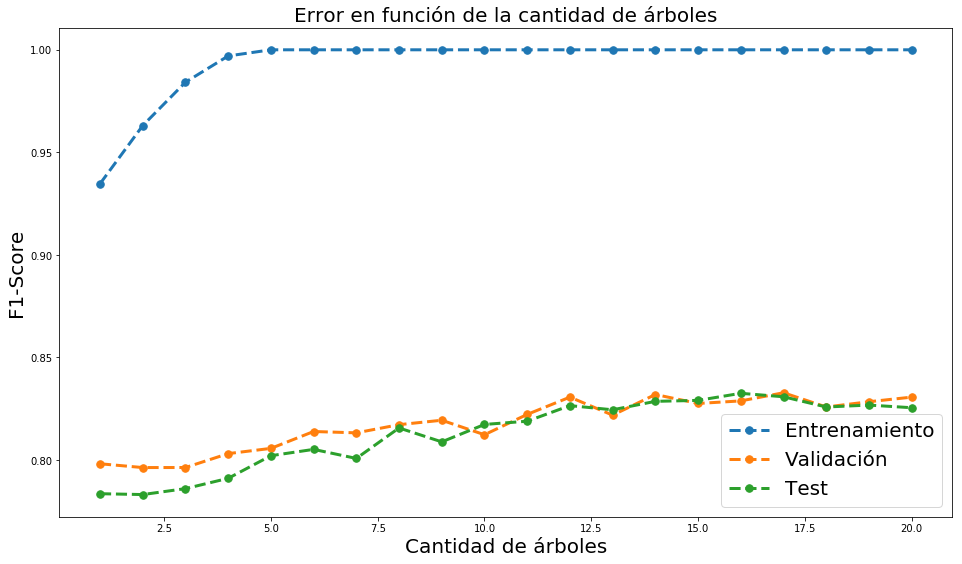

El mejor F1-Score es 0.830843373494


In [7]:
from sklearn.ensemble import AdaBoostClassifier

eTest = list()
eTrain = list()
eVal = list()

maxArboles = 21

#Se procede a calcularlos errores en funcion de la cantidad de árboles
for i in range(1, maxArboles):

    model = AdaBoostClassifier(base_estimator=Tree(max_depth=mejorProfundidad, random_state = 0), n_estimators= i, random_state = 0)
       
    #Se entrena el modelo, notar que se transforma la matriz columna y a un vector fila
    model.fit(X_train, y_train.reshape(y_train.shape[0]))
    
    #Se predice el entrenamiento y el test
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    y_pred_test = model.predict(X_test)
    
    #Se guardan los errores
    eTrain.append(f1_score(y_train, y_pred_train))
    eVal.append(f1_score(y_val, y_pred_val))
    eTest.append(f1_score(y_test, y_pred_test))
    
plt.figure(figsize = (16, 9))

grosor = 3
tamañopto = 15

plt.plot( [i for i in range(1, maxArboles)] , eTrain, ".--", linewidth = grosor, markersize = tamañopto)
plt.plot( [i for i in range(1, maxArboles)] , eVal, ".--", linewidth = grosor, markersize = tamañopto)
plt.plot( [i for i in range(1, maxArboles)], eTest, ".--", linewidth = grosor, markersize = tamañopto)
plt.legend(["Entrenamiento", "Validación" ,  "Test"], prop={'size': 20})
plt.title('Error en función de la cantidad de árboles', fontsize=20)
plt.xlabel("Cantidad de árboles", fontsize=20)
plt.ylabel("F1-Score", fontsize=20)

plt.show()

print("El mejor F1-Score es",eTest[eVal.index(max(eVal))] )

<p style="font-size: 25px; line-height: 135%;}">
<b>Pregunta f</b>
</p>

In [8]:
from sklearn.svm import SVC as SVM #SVC is for classification

mayor = -1

espacio = np.logspace(1, 10, num=10)

for i in espacio:
    model= SVM()
    model.set_params(C=i)
    model.fit(X_train,y_train.reshape(y_train.shape[0]))
    y_pred_val = model.predict(X_val)
    score = f1_score(y_val, y_pred_val)
    
    if score > mayor:
        mayor = score
        mejorC = i
        
model= SVM()
model.set_params(C=mejorC)
model.fit(X_train,y_train.reshape(y_train.shape[0]))

y_pred_test = model.predict(X_test)
score = f1_score(y_test, y_pred_test)
print(score)
print(mejorC)

0.790987535954
10.0


In [9]:
from sklearn.preprocessing import RobustScaler
rbs = RobustScaler()
rbs.fit(X_train)
X_tr = rbs.transform(X_train)
X_ts = rbs.transform(X_test)

model= SVM()
model.set_params(C=mejorC)
model.fit(X_train,y_train.reshape(y_train.shape[0]))

y_pred_test = model.predict(X_test)
score = f1_score(y_test, y_pred_test)
print(score)


0.790987535954


Iteración 2 completada.
Iteración 3 completada.
Iteración 4 completada.
Iteración 5 completada.
Iteración 6 completada.
Iteración 7 completada.
Iteración 8 completada.


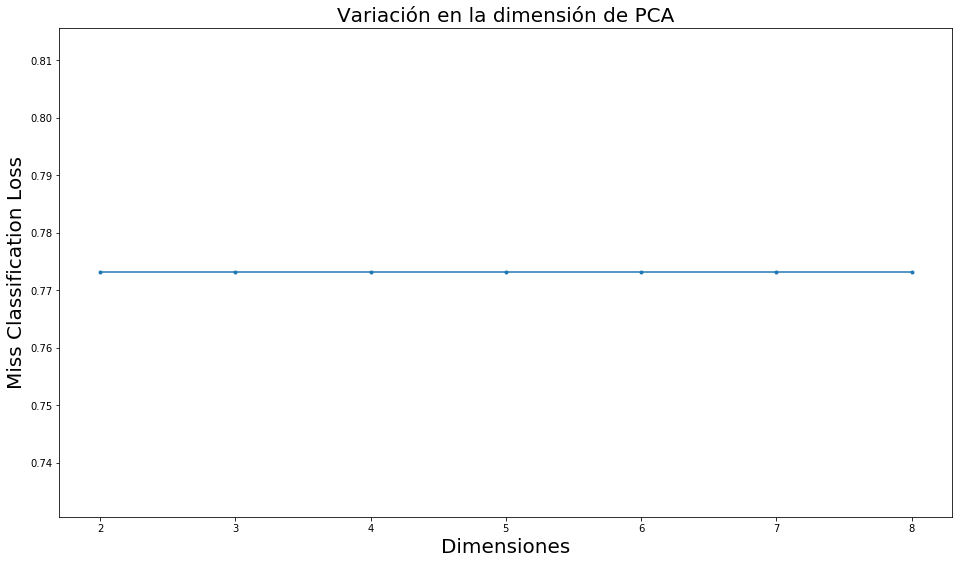

In [10]:
from sklearn.decomposition import PCA
erroresPCA = list()
num = 8 + 1
for d in range(2, num):
    #print("nya")
    pca_model = PCA(n_components=d)
    pca_model.fit(X_train)
    #print("Se terminó de hacer PCA")
    X_pca_train = pca_model.transform(X_train)
    X_pca_test = pca_model.transform(X_test)
    
    #SVM lineal
    modeloSVM= SVM()
    modeloSVM.fit(X_pca_train,y_train.reshape(y_train.shape[0]))

    y_pred = modeloSVM.predict(X_pca_test)
    erroresPCA.append(f1_score(y_val, y_pred_val))
    print("Iteración",d,"completada.")
    

fig = plt.figure(figsize = (16, 9))
plt.plot(range(2, num), [i for i in erroresPCA], ".-")

#plt.legend(["Regresión Logistica", "SVM"], prop={'size': 20})

plt.title('Variación en la dimensión de PCA', fontsize=20)
plt.xlabel("Dimensiones", fontsize=20)
plt.ylabel("Miss Classification Loss", fontsize=20)

plt.show()

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
modelLDA = LDA()
modelLDA.fit(X_train,y_train.reshape(y_train.shape[0]))

X_lda_train = modelLDA.transform(X_train)
X_lda_test = modelLDA.transform(X_test)

model= SVM()
#model.set_params(C=mejorC)
model.fit(X_lda_train,y_train.reshape(y_train.shape[0]))

y_pred_test = model.predict(X_lda_test)
score = f1_score(y_test, y_pred_test)
print(score)


0.794908062235
